<a href="https://colab.research.google.com/github/ajaythakur3369/Oasis-Infobyte-Internship/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Email Spam Detection**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Oasis Infobyte**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Oasis-Infobyte-Internship)**

## **Importing the Libraries**

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

# Downloading the Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer

# Using CountVectorizer for Bag of Words and vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Using Train_Test_Split to split the dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier, and Multinomial Naive Bayes are models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix are for analyzing models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## **Reading the dataset**

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the dataset
spam = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/Oasis_Infobyte/File_Name/Email_spam_dataset.csv", encoding = 'ISO-8859-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### **Checking for Null values**

In [ ]:
spam.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### **Checking the first values in the Dataset**

In [ ]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### **Selecting the required Columns in the Dataset**

In [ ]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **Checking the Dimensions of the dataset**

In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam.shape

(5572, 2)

In [ ]:
spam.groupby('label')

In [ ]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

### **Plotting the labels in the dataset**

<Axes: xlabel='label'>

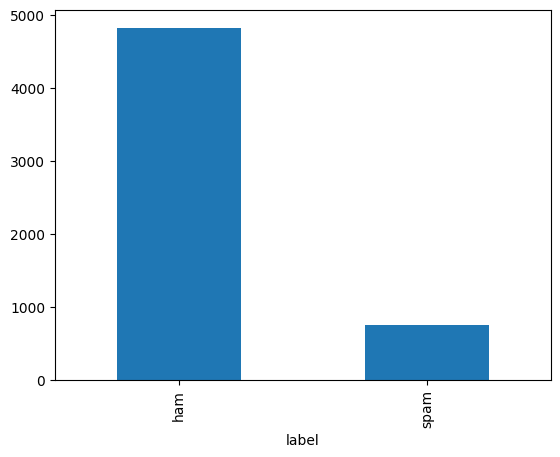

In [ ]:
spam['label'].value_counts().plot(kind = 'bar')

## **Natural Language Processing**

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

### **Creating a Bag of Words Model**

In [ ]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

## **Data Modeling**

### **Splitting the Dataset into Training and Testing Sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## **Model Building**

### **Create ML Models**

### **1. Random Forest Classifier**

In [ ]:
# Model 1: Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

RandomForestClassifier()

### **2. Decision Tree Classifier**

In [ ]:
# Model 2: Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

### **3. Multinomial Naive Bayes**

In [ ]:
# Model 3: Multinomial Naive Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

### **Prediction**

In [ ]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [ ]:
pred1

array([False, False,  True, ..., False, False, False])

In [ ]:
pred2

array([False, False, False, ..., False, False,  True])

In [ ]:
pred3

array([False, False,  True, ..., False, False,  True])

## **Model Testing**

In [ ]:
# Model 1: Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))

Random Forest Classifier
Confusion Matrix: 
[[965   0]
 [ 28 122]]
Accuracy:  0.9748878923766816


In [ ]:
# Model 2: Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))

Decision Tree Classifier
Confusion Matrix: 
[[956   9]
 [ 22 128]]
Accuracy:  0.9721973094170404


In [ ]:
# Model 3: Multinomial Naive Bayes
print("Multinomial Naive Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Multinomial Naive Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


<Axes: >

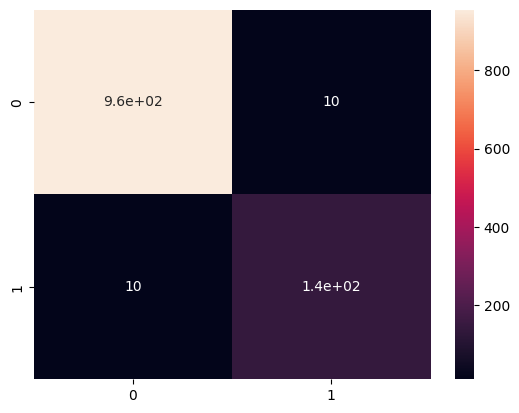

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)
import seaborn as sns
sns.heatmap(cm, annot = True)

In [ ]:
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99       965
        True       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.93      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9

## **Result: According to accuracy scores, Multinomial Naive Bayes is the best model.**